# Machine learning for classification (tree, bag, RF)

In [2]:
import random as rd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
import math

In [3]:
group1=np.random.multivariate_normal([2,2],
                                     [[0.1,0],[0,1]],200)
group2=np.random.multivariate_normal([1,0],
                                     [[0.6,0],[0,0.6]],200)

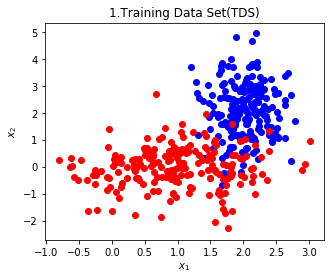

In [4]:
plt.figure(figsize=(5,4))
plt.scatter(group1[:,0],group1[:,1],c='blue')
plt.scatter(group2[:,0],group2[:,1],c='red')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('1.Training Data Set(TDS)')
plt.show()

In [5]:
data1 = pd.DataFrame({'x1':group1[:,0],'x2':group1[:,1],'label':[1 for i in range(group1.shape[0])]})
data2 = pd.DataFrame({'x1':group2[:,0],'x2':group2[:,1],'label':[0 for i in range(group2.shape[0])]})
#our final data set
data = pd.concat([data1,data2],ignore_index=True)

In [6]:
data

,x1,x2,label
0,2.728687,0.222158,1
1,1.895965,2.038934,1
2,2.202749,2.804572,1
3,1.946861,2.796197,1
4,2.437765,2.210049,1
...,...,...,...
395,0.904841,0.903436,0
396,0.224741,-0.405700,0
397,0.982886,-1.134718,0
398,0.014144,0.023166,0


## Classification Decision Tree

### Model calibration

In [7]:
X = data.loc[:,['x1','x2']]
Y = data.loc[:,'label']

In [8]:
# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree1 = tree.DecisionTreeClassifier() 
treefit = tree1.fit(X, Y)
pY_train = treefit.predict_proba(X)

#Score and decision on the training set
predxclass = np.argmax(pY_train,axis=1)
print(predxclass)

#Accuracy
E_train=(Y != predxclass).sum()/len(Y)
print("Error on the complete training set -> %5.2f"%E_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Error on the complete training set ->  0.00


### Model description

In [9]:
 from sklearn.tree import export_text 
 r = export_text(treefit)
 print(r)

|--- feature_1 <= 1.04
|   |--- feature_0 <= 1.66
|   |   |--- feature_0 <= 1.39
|   |   |   |--- class: 0
|   |   |--- feature_0 >  1.39
|   |   |   |--- feature_0 <= 1.41
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  1.41
|   |   |   |   |--- feature_1 <= 0.67
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  0.67
|   |   |   |   |   |--- feature_1 <= 0.71
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.71
|   |   |   |   |   |   |--- class: 0
|   |--- feature_0 >  1.66
|   |   |--- feature_1 <= 0.17
|   |   |   |--- feature_0 <= 1.68
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  1.68
|   |   |   |   |--- feature_1 <= -0.45
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  -0.45
|   |   |   |   |   |--- feature_1 <= -0.42
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  -0.42
|   |   |   |   |   |   |--- feature_0 <= 2.00
|   |   |   |   |   |   |   |--- feature_0 

In [10]:
treefit.decision_path
treefit.feature_importances_
treefit.get_params
treefit.cost_complexity_pruning_path

<bound method BaseDecisionTree.cost_complexity_pruning_path of DecisionTreeClassifier()>

### Score and decision boundaries

In [11]:
x1_min = min(np.concatenate((group1[:,0],group2[:,0])))
x1_max = max(np.concatenate((group1[:,0],group2[:,0])))
x2_min = min(np.concatenate((group1[:,1],group2[:,1])))
x2_max = max(np.concatenate((group1[:,1],group2[:,1])))
Neval=15
h1=(x1_max-x1_min)/Neval
h2=(x2_max-x2_min)/Neval
x1Eval,x2Eval = np.meshgrid(np.arange(x1_min,x1_max,h1),np.arange(x2_min,x2_max,h2))
# make predictions for new dataset
new_data = pd.DataFrame({'x1':x1Eval.flatten(),'x2':x2Eval.flatten()})
new_y_pred = treefit.predict(new_data)

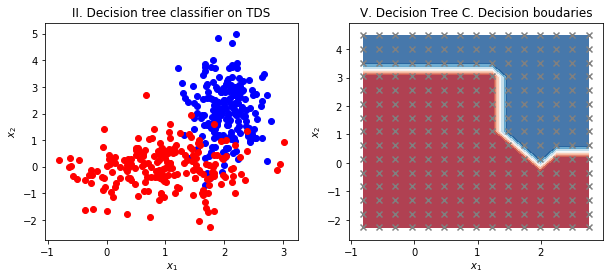

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
for i in range(data.shape[0]):
    plt.scatter(data.loc[i,'x1'],data.loc[i,'x2'],c=['red','blue'][predxclass[i]])
plt.xlabel('$x_1$');plt.ylabel('$x_2$');plt.title('II. Decision tree classifier on TDS')


plt.subplot(1,2,2)
plt.xlabel('$x_1$');plt.ylabel('$x_2$');plt.title('V. Decision Tree C. Decision boudaries')

Z = new_y_pred.reshape(x1Eval.shape)
cm = plt.cm.RdBu
plt.contourf(x1Eval, x2Eval, Z, cmap=cm, alpha=.8);plt.scatter(x1Eval,x2Eval,c='gray',marker='x')
plt.show()

### Meta parameters: split, leaf and deviance
For the funtion DecisionTreeClassifier(), we have default values of meta parameters as: 

DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [27]:
tree2 = tree.DecisionTreeClassifier(min_samples_split=20,    # the minimum number of samples required to split an internal node                                   
                                    min_samples_leaf=10,    # the minimum number of samples required to be at a leaf node
                                    min_impurity_decrease=0.03)
treefit = tree2.fit(X, Y)
pY_train = treefit.predict_proba(X)

#Score and decision on the training set
predxclass = np.argmax(pY_train,axis=1)
#print(predxclass)

#Accuracy
E_train=(Y != predxclass).sum()/len(Y)
print("Error on the complete training set -> %5.2f"%E_train)

Error on the complete training set ->  0.08


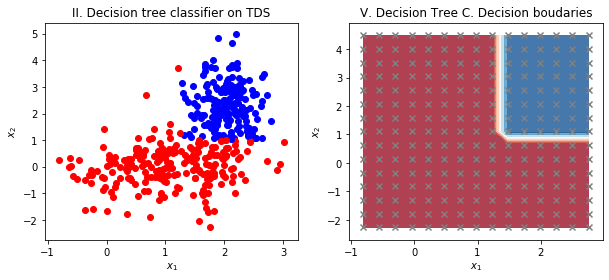

In [28]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
for i in range(data.shape[0]):
    plt.scatter(data.loc[i,'x1'],data.loc[i,'x2'],c=['red','blue'][predxclass[i]])
plt.xlabel('$x_1$');plt.ylabel('$x_2$');plt.title('II. Decision tree classifier on TDS')


plt.subplot(1,2,2)
plt.xlabel('$x_1$');plt.ylabel('$x_2$');plt.title('V. Decision Tree C. Decision boudaries')

new_y_pred = treefit.predict(new_data)
Z = new_y_pred.reshape(x1Eval.shape)
plt.contourf(x1Eval, x2Eval, Z, cmap=cm, alpha=.8);plt.scatter(x1Eval,x2Eval,c='gray',marker='x')
plt.show()

## Bagging
### Model calibration

In [32]:
#Bagging
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_text
from sklearn.ensemble import BaggingClassifier

treemod = tree.DecisionTreeClassifier() 
bagmod=BaggingClassifier(base_estimator=treemod, n_estimators=10, random_state=0) 

treemodfit=treemod.fit(X, Y);bagmodfit=bagmod.fit(X, Y);pY_train=bagmodfit.predict_proba(X)
#Score and decision on the training set 
predxclass=np.argmax(pY_train,axis=1)
#print(predxclass)

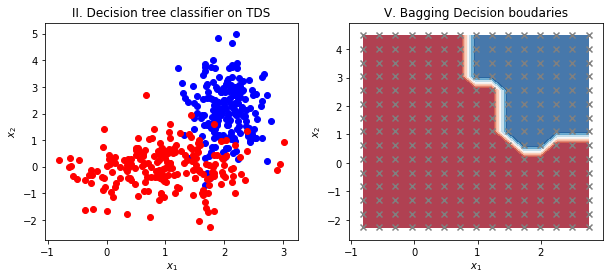

In [34]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
for i in range(data.shape[0]):
    plt.scatter(data.loc[i,'x1'],data.loc[i,'x2'],c=['red','blue'][predxclass[i]])
plt.xlabel('$x_1$');plt.ylabel('$x_2$');plt.title('II. Decision tree classifier on TDS')


plt.subplot(1,2,2)
plt.xlabel('$x_1$');plt.ylabel('$x_2$');plt.title('V. Bagging Decision boudaries')

new_y_pred = bagmodfit.predict(new_data)
Z = new_y_pred.reshape(x1Eval.shape)
plt.contourf(x1Eval, x2Eval, Z, cmap=cm, alpha=.8);plt.scatter(x1Eval,x2Eval,c='gray',marker='x')
plt.show()

### Meta parameters of bagging function